In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
money = pd.read_csv("Downloads/PPPP.csv", delimiter=",")

In [3]:
def convert_money(string):
    return float(string.replace(",", "."))

In [4]:
money["curs"] = money["curs"].apply(convert_money)

In [5]:
money.head(3)

,nominal,data,curs,cdx
0,1,10.01.2019,67.0795,Доллар США
1,1,11.01.2019,66.8605,Доллар США
2,1,12.01.2019,66.9167,Доллар США


In [6]:
curs = money["curs"]

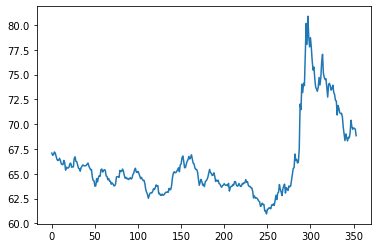

In [7]:
plt.plot(curs)

In [8]:
past = 7 * 4
future = 7

In [9]:
start = past
end = len(curs) - future

prepared = []

for i in range(start,end):
    past_and_future_curs = curs[(i-past):(i+future)]
    prepared.append(list(past_and_future_curs))

In [10]:
past_columns = [f"past_{i}" for i in range(past)]
future_columns = [f"future_{i}" for i in range(future)]

In [11]:
past_columns

['past_0',
 'past_1',
 'past_2',
 'past_3',
 'past_4',
 'past_5',
 'past_6',
 'past_7',
 'past_8',
 'past_9',
 'past_10',
 'past_11',
 'past_12',
 'past_13',
 'past_14',
 'past_15',
 'past_16',
 'past_17',
 'past_18',
 'past_19',
 'past_20',
 'past_21',
 'past_22',
 'past_23',
 'past_24',
 'past_25',
 'past_26',
 'past_27']

In [12]:
future_columns

['future_0',
 'future_1',
 'future_2',
 'future_3',
 'future_4',
 'future_5',
 'future_6']

In [13]:
df = pd.DataFrame(prepared, columns=(past_columns+future_columns))

In [14]:
df

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_25,past_26,past_27,future_0,future_1,future_2,future_3,future_4,future_5,future_6
0,67.0795,66.8605,66.9167,67.1920,67.0820,66.7617,66.4438,66.3309,66.3634,66.5499,...,65.6783,66.5429,66.7044,66.2470,66.2022,65.8568,65.5401,65.5149,65.2582,65.6182
1,66.8605,66.9167,67.1920,67.0820,66.7617,66.4438,66.3309,66.3634,66.5499,66.3318,...,66.5429,66.7044,66.2470,66.2022,65.8568,65.5401,65.5149,65.2582,65.6182,65.7570
2,66.9167,67.1920,67.0820,66.7617,66.4438,66.3309,66.3634,66.5499,66.3318,66.0016,...,66.7044,66.2470,66.2022,65.8568,65.5401,65.5149,65.2582,65.6182,65.7570,65.8895
3,67.1920,67.0820,66.7617,66.4438,66.3309,66.3634,66.5499,66.3318,66.0016,65.9170,...,66.2470,66.2022,65.8568,65.5401,65.5149,65.2582,65.6182,65.7570,65.8895,65.8145
4,67.0820,66.7617,66.4438,66.3309,66.3634,66.5499,66.3318,66.0016,65.9170,65.9300,...,66.2022,65.8568,65.5401,65.5149,65.2582,65.6182,65.7570,65.8895,65.8145,65.7956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,77.0416,75.1290,74.7163,74.4960,74.5706,73.6894,72.7263,73.9719,74.1169,73.8725,...,68.9831,68.3413,69.0151,68.6319,68.3123,68.6745,68.6183,69.1219,70.3950,69.7524
315,75.1290,74.7163,74.4960,74.5706,73.6894,72.7263,73.9719,74.1169,73.8725,73.4326,...,68.3413,69.0151,68.6319,68.3123,68.6745,68.6183,69.1219,70.3950,69.7524,69.4822
316,74.7163,74.4960,74.5706,73.6894,72.7263,73.9719,74.1169,73.8725,73.4326,73.5819,...,69.0151,68.6319,68.3123,68.6745,68.6183,69.1219,70.3950,69.7524,69.4822,69.6180
317,74.4960,74.5706,73.6894,72.7263,73.9719,74.1169,73.8725,73.4326,73.5819,73.9298,...,68.6319,68.3123,68.6745,68.6183,69.1219,70.3950,69.7524,69.4822,69.6180,69.5725


In [15]:
LinReg = LinearRegression()

In [16]:
X = df[past_columns][:-1]
y = df[future_columns][:-1]

In [17]:
X_test = df[past_columns][-1:]
y_test = df[future_columns][-1:]


In [18]:
X_test

,past_0,past_1,past_2,past_3,past_4,past_5,past_6,past_7,past_8,past_9,...,past_18,past_19,past_20,past_21,past_22,past_23,past_24,past_25,past_26,past_27
318,74.5706,73.6894,72.7263,73.9719,74.1169,73.8725,73.4326,73.5819,73.9298,73.2056,...,71.1012,70.752,69.7114,68.9831,68.3413,69.0151,68.6319,68.3123,68.6745,68.6183


In [19]:
LinReg.fit(X,y)

LinearRegression()

In [20]:
prediction = LinReg.predict(X_test)

In [21]:
prediction

array([[68.14893273, 67.79970533, 68.13547495, 67.87528989, 67.87906567,
        67.68955618, 67.54623347]])

In [22]:
y_test

,future_0,future_1,future_2,future_3,future_4,future_5,future_6
318,69.1219,70.395,69.7524,69.4822,69.618,69.5725,69.4835


In [23]:
np.linalg.norm(y_test - prediction)

4.8167621996385375

In [24]:
from sklearn.metrics import mean_absolute_error

In [25]:
mean_absolute_error(y_test, prediction)

1.764463111194587

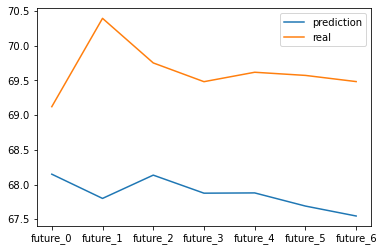

In [26]:
plt.plot(prediction[0], label="prediction")
plt.plot(y_test.iloc[0], label="real")
plt.legend()

In [27]:
from sklearn.neural_network import MLPRegressor

In [28]:
MLP = MLPRegressor(random_state=42, max_iter=500, hidden_layer_sizes=(30,40))

In [29]:
MLP.fit(X,y)

D:\aa\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(hidden_layer_sizes=(30, 40), max_iter=500, random_state=42)

In [30]:
prediction = MLP.predict(X_test)

In [31]:
print("np.linalg.norm(y_test - prediction)", np.linalg.norm(y_test - prediction))
print("mean_absolute_error", mean_absolute_error(y_test, prediction))

np.linalg.norm(y_test - prediction) 4.792938209182382
mean_absolute_error 1.7194553406264939


In [32]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [33]:
import warnings; warnings.simplefilter('ignore')

In [35]:
GS = GridSearchCV(MLPRegressor(random_state=42), {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'max_iter': [10, 100, 500],
    'hidden_layer_sizes': [(10, 10),(50, 50, 50), (100, 100, 100)],
}, scoring ='neg_mean_absolute_error')

In [36]:
GS.fit(X,y)

GridSearchCV(estimator=MLPRegressor(random_state=42),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(10, 10), (50, 50, 50),
                                                (100, 100, 100)],
                         'max_iter': [10, 100, 500]},
             scoring='neg_mean_absolute_error')

In [38]:
GS.best_params_

{'activation': 'identity',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 100}

In [39]:
GS.best_score_

-1.36984588407305

In [40]:
GS.best_estimator_

MLPRegressor(activation='identity', hidden_layer_sizes=(100, 100, 100),
             max_iter=100, random_state=42)

In [41]:
prediction = GS.best_estimator_.predict(X_test)

In [42]:
mean_absolute_error(y_test, prediction)

0.7872139799105408